<a href="https://colab.research.google.com/github/harithaselvakumaran/Deep-Learning/blob/main/Handling_imbalanced_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Telco-Customer-Churn.csv to Telco-Customer-Churn.csv


In [43]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [44]:
df = df.drop('customerID', axis=1)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [47]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Converting Total charges from string to int

In [48]:
df['MonthlyCharges'].values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [49]:
df.shape

(7043, 20)

In [50]:
df[pd.to_numeric(df['TotalCharges'],errors='coerce').isnull()]
## You could directly use errors='coerce' which will replace all ' ' values Nan

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [53]:
df_new = df[df['TotalCharges']!=' ']

In [54]:
df_new[df_new['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [55]:
## We have dropped all the rows with empty Total Charges
df_new.shape

(7032, 20)

In [56]:
df_new['TotalCharges'] = pd.to_numeric(df_new['TotalCharges'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
tenure_churn_no = df_new[df_new['Churn']=='No']['tenure']
tenure_churn_yes = df_new[df_new['Churn']=='Yes']['tenure']

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


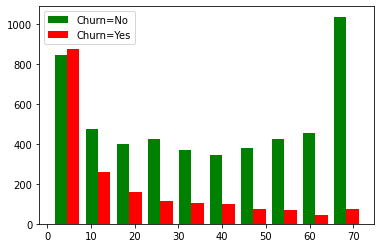

In [58]:
plt.hist([tenure_churn_no, tenure_churn_yes], color=['green','red'], label=['Churn=No', 'Churn=Yes'])
plt.legend()

As tenure increases, churn rate decreases

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


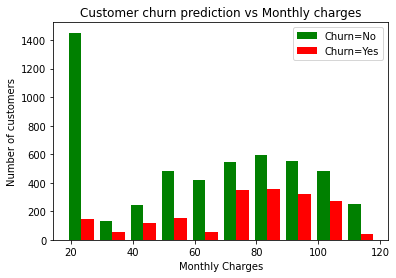

In [59]:
mc_churn_no = df_new[df_new['Churn']=='No']['MonthlyCharges']
mc_churn_yes = df_new[df_new['Churn']=='Yes']['MonthlyCharges']

plt.xlabel('Monthly Charges')
plt.ylabel('Number of customers')
plt.title('Customer churn prediction vs Monthly charges')

plt.hist([mc_churn_no, mc_churn_yes], color=['green','red'], label=['Churn=No', 'Churn=Yes'])
plt.legend()

When monthly charges are low, there is low churn 

### Label Encoding

In [60]:
def unique_value_cat_col(df):
  for column in df:
    if df[column].dtypes=='object':
      print(f'{column} : {df[column].unique()}')

In [61]:
unique_value_cat_col(df_new)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [62]:
df_new.replace('No internet service','No',inplace=True)
df_new.replace('No phone service','No',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [63]:
df_new.replace('Yes',1,inplace=True)
df_new.replace('No',0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [64]:
df_new['gender'].replace({'Female':1,'Male':0},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [65]:
# One-hot encoding as it has more than 3 categories
df_new = pd.get_dummies(df_new, columns=['InternetService','Contract','PaymentMethod'])

In [66]:
for column in df_new:
    print(f'{column} : {df_new[column].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]
InternetService_0 : [0 1]
InternetService_DSL : [1 0]
InternetService_Fiber optic : [0 1]
Contract_Month-to-month : [1 0]
Contract_One year : [0 1]
Contract_Two year : [0 1]
PaymentMethod_Bank transfer (automatic) : [0 1]
PaymentMethod_Credit card (automatic) : [0 1]
PaymentMethod_Electronic check : [1 0]
PaymentMethod_Mailed check : [0 1]


In [67]:
df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,0,1,1,0,0,0,0,1,0


In [68]:
df_new.shape

(7032, 27)

All the values are now in integer format

In [69]:
df_new.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

Scaling the values between 0-1

In [70]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df_new[cols_to_scale] = mms.fit_transform(df_new[cols_to_scale])

In [71]:
df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,1,0,0,0,0.239303,0.210241,0,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.521891,0.015330,1,0,0,1,1,0,0,0,0,1,0


In [72]:
for column in df_new:
    print(f'{column} : {df_new[column].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

### Model Building

In [74]:
X = df_new.drop('Churn',axis=1)
Y = df_new['Churn']

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=5)
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
Y_pred = lr.predict(X_test)
Y_pred[:5]

array([0, 0, 0, 1, 0])

In [79]:
Y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

### Classification report

In [80]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       999
           1       0.68      0.56      0.61       408

    accuracy                           0.79      1407
   macro avg       0.75      0.72      0.74      1407
weighted avg       0.79      0.79      0.79      1407



### Imbalanced Dataset

In [82]:
class_count_0, class_count_1 = df_new['Churn'].value_counts()
class_count_0, class_count_1

(5163, 1869)

In [83]:
#Created seperate dataframes for both
df_class_0 = df_new[df_new['Churn']==0]
df_class_1 = df_new[df_new['Churn']==1]

In [84]:
df_class_0.shape, df_class_1.shape

((5163, 27), (1869, 27))

Method1 - Undersampling majorty class

In [85]:
# Undersampling majority class - Selects only 1869 examples 

df_class_0_under = df_class_0.sample(class_count_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)    ##combines both the dataframes
df_test_under.shape

(3738, 27)

In [86]:
df_test_under['Churn'].value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

In [90]:
X = df_test_under.drop('Churn',axis=1)
Y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
# Stratify makes sure that X_train and X_test each have equal 0's and 1's
X_train_under, X_test_under, Y_train_under, Y_test_under = train_test_split(X,Y,test_size=0.2,random_state=15, stratify=Y)

In [91]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_under, Y_train_under)
Y_pred_under = lr.predict(X_test_under)

In [92]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_under,Y_pred_under))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       374
           1       0.73      0.77      0.75       374

    accuracy                           0.74       748
   macro avg       0.75      0.74      0.74       748
weighted avg       0.75      0.74      0.74       748



Method2 - Oversampling minority class

In [93]:
# OverSampling minority class

class_count_0, class_count_1
df_class_1_over = df_class_1.sample(class_count_0, replace=True)
df_class_1_over.shape

(5163, 27)

In [94]:
#Combine both dataframes
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
df_test_over.shape

(10326, 27)

In [95]:
df_test_over['Churn'].value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [96]:
X = df_test_over.drop('Churn',axis=1)
Y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
# Stratify makes sure that X_train and X_test each have equal 0's and 1's
X_train_over, X_test_over, Y_train_over, Y_test_over = train_test_split(X,Y,test_size=0.2,random_state=15, stratify=Y)

In [98]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_over, Y_train_over)
Y_pred_over = lr.predict(X_test_over)
print(classification_report(Y_test_over,Y_pred_over))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1033
           1       0.75      0.81      0.78      1033

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066



Method3 - Smote

In [99]:
X = df_new.drop('Churn', axis=1)
Y = df_new['Churn']

In [100]:
Y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [101]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [102]:
from sklearn.model_selection import train_test_split
# Stratify makes sure that X_train and X_test each have equal 0's and 1's
X_train_sm, X_test_sm, Y_train_sm, Y_test_sm = train_test_split(x_sm,y_sm,test_size=0.2,random_state=15, stratify=y_sm)

In [104]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_sm, Y_train_sm)
Y_pred_sm = lr.predict(X_test_sm)
print(classification_report(Y_test_sm,Y_pred_sm))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77      1033
           1       0.76      0.81      0.78      1033

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066



Method4 - Using Ensemble Method with undersampling

In [105]:
X = df_new.drop('Churn', axis=1)
Y = df_new['Churn']

from sklearn.model_selection import train_test_split
# Stratify makes sure that X_train and X_test each have equal 0's and 1's
X_train_ensemble, X_test_ensemble, Y_train_ensemble, Y_test_ensemble = train_test_split(X,Y,test_size=0.2,random_state=15, stratify=Y)

In [106]:
Y_train.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

In [107]:
# Dataset of only training samples
df2 = X_train.copy()
df2['Churn'] = Y_train

In [108]:
df2_class0 = df2[df2['Churn']==0]
df2_class1 = df2[df2['Churn']==1]

In [109]:
df2['Churn'].value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

In [110]:
def get_training_set(df_majority, df_minority, start, end):
  df_train = pd.concat([df_majority[start:end], df_minority], axis=0)
  X_train = df_train.drop('Churn', axis=1)
  Y_train = df_train['Churn']

  return X_train, Y_train

In [111]:
X_train, Y_train = get_training_set(df2_class0,df2_class1,0, 1495)
lr1 = LogisticRegression()
lr1.fit(X_train, Y_train)
Y_pred1 = lr1.predict(X_test)
print(classification_report(Y_test,Y_pred1))


              precision    recall  f1-score   support

           0       0.76      0.72      0.74       374
           1       0.73      0.77      0.75       374

    accuracy                           0.74       748
   macro avg       0.75      0.74      0.74       748
weighted avg       0.75      0.74      0.74       748



In [119]:
X_train, Y_train = get_training_set(df2_class0,df2_class1, 1495, 2990)
lr2 = LogisticRegression()
lr2.fit(X_train, Y_train)
Y_pred2 = lr2.predict(X_test)
print(classification_report(Y_test,Y_pred2))

ValueError: ignored

In [115]:
X_train, Y_train = get_training_set(df2_class0,df2_class1,2990, 4130)
lr = LogisticRegression()
lr.fit(X_train, Y_train)
Y_pred1 = lr.predict(X_test)
print(classification_report(Y_test,Y_pred1))


ValueError: ignored

In [116]:
len(Y_pred1)

748

In [117]:
# Get majority vote
vote1 = 0
vote2 = 0
vote3 = 1

final_vote= vote1+vote2+vote3
final_vote

# If vote>2 i.e., 2 or 3 then majority vote is 1 else it's 0

1

In [ ]:
Y_pred_final = Y_pred1.copy()

for i in range(len(Y_pred1)):
  n_ones = Y_pred1[i] + Y_pred2[i] + Y_pred3[i]
  if n_ones>1:
    Y_pred_final[i] = 1
  else:
    Y_pred_final[i] = 0

In [ ]:
print(classification_report(Y_test,Y_pred_final))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76      1033
           1       0.46      0.77      0.57       374

    accuracy                           0.70      1407
   macro avg       0.67      0.72      0.67      1407
weighted avg       0.77      0.70      0.71      1407

